In [1]:
import sys
sys.path.append("../../..")
sys.path.append("../..")

In [2]:
# Import necessary libraries
import utility
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import keras
from tensorflow.keras import layers, models
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

from pdf2image import convert_from_path
from PIL import Image
from IPython.display import display


2025-08-03 10:31:01.490118: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-03 10:31:01.490158: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-03 10:31:01.491105: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-03 10:31:01.496317: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-03 10:31:02.154493: W tensorflow/compiler/tf2

In [3]:
import pandas as pd
import numpy as np
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr

In [4]:
import pickle
import matplotlib.pyplot as plt

# Load history dict
with open('history.pkl', 'rb') as f:
    history_dict = pickle.load(f)



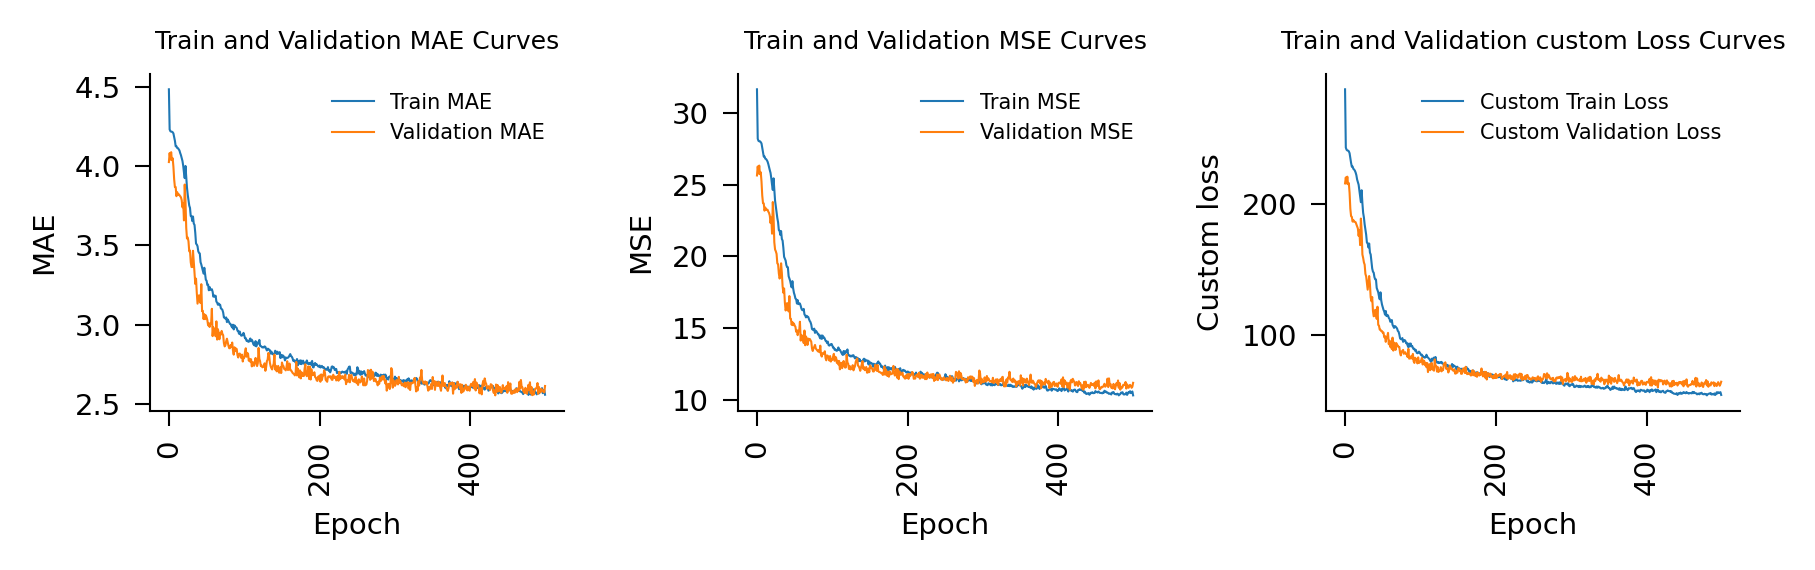

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(6, 2), dpi =300)  # wider for 3 plots

# Plot on the first axis only
ax[0].plot(history_dict['mae'], label='Train MAE', lw = 0.5)
if 'val_mae' in history_dict:
    ax[0].plot(history_dict['val_mae'], label='Validation MAE', lw = 0.5)
ax[0].set_ylabel('MAE')
ax[0].set_title('Train and Validation MAE Curves', fontsize=6)

# Plot on the first axis only
ax[1].plot(history_dict['mse'], label='Train MSE', lw = 0.5)
if 'val_mse' in history_dict:
    ax[1].plot(history_dict['val_mse'], label='Validation MSE', lw = 0.5)
ax[1].set_ylabel('MSE')
ax[1].set_title('Train and Validation MSE Curves', fontsize=6)

# Plot on the first axis only
ax[2].plot(history_dict['loss'], label='Custom Train Loss', lw = 0.5)
if 'val_loss' in history_dict:
    ax[2].plot(history_dict['val_loss'], label='Custom Validation Loss', lw = 0.5)
ax[2].set_ylabel('Custom loss')
ax[2].set_title('Train and Validation custom Loss Curves', fontsize=6)



for i in range(3):
    ax[i].set_xlabel('Epoch')
    ax[i].legend(frameon=False, fontsize = 5)   
    ax[i] = utility.custom_figure_axis(ax=ax[i], fontsize=7)


# Custom formatting if needed


plt.tight_layout()
plt.show()


In [6]:
df_epoch = pd.DataFrame(columns = ["Train_MAE", "Val_MAE", "Train_MSE", "Val_MSE", "Train_Custom_loss", "Val_Custom_loss"])
df_epoch["Train_MAE"] = history_dict['mae']
df_epoch["Val_MAE"] = history_dict['val_mae']
df_epoch["Train_MSE"] = history_dict['mse']
df_epoch["Val_MSE"] = history_dict['val_mse']
df_epoch["Train_Custom_loss"] = history_dict['loss']
df_epoch["Val_Custom_loss"] = history_dict['val_loss']
df_epoch["Epoch"] = range(0, 500)

In [7]:
df_epoch

,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_Custom_loss,Val_Custom_loss,Epoch
0,4.484241,4.025312,31.627085,25.633589,287.373932,215.548447,0
1,4.230874,4.082320,28.190620,26.257339,242.888809,220.081955,1
2,4.219831,4.040910,28.040306,25.765850,241.252686,215.513748,2
3,4.217005,4.087564,28.008993,26.320354,240.681671,220.669586,3
4,4.216681,4.037175,28.011280,25.720425,240.570114,214.877609,4
...,...,...,...,...,...,...,...
495,2.599274,2.588413,10.623605,11.061726,56.112095,63.813267,495
496,2.567228,2.580688,10.490103,10.991246,55.748898,62.487362,496
497,2.581436,2.574457,10.527369,10.860288,55.742699,61.069923,497
498,2.587287,2.572409,10.604384,10.933141,56.167980,62.276104,498


Saved plot: Tansformer_loss_curve.pdf


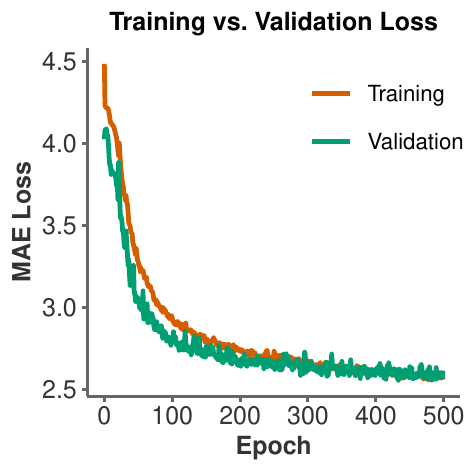

In [8]:
# --- Step 0: rpy2 setup ---
pandas2ri.activate()
importr('ggplot2')
importr('grDevices')

# --- Step 1: Define R function ---
ro.r('''
loss_curve_plot <- function(df, filename, fig_width_cm = 6, fig_height_cm = 6,
                            xlab = "Epoch", ylab = "Loss", title = "Loss Curve",
                            legend_pos = c(0.8, 0.8)) {
  library(ggplot2)
  library(grDevices)
  p <- ggplot(df, aes(x = Epoch)) +
    geom_line(aes(y = Train_MAE, color = "Training"), size = 0.8, linetype = "solid") +
    geom_line(aes(y = Val_MAE, color = "Validation"), size = 0.8, linetype = "solid") +
    scale_color_manual(
      values = c("Training" = "#D55E00", "Validation" = "#009E73"),
      guide = guide_legend(override.aes = list(size = 1.5))
    ) +
    labs(title = title, x = xlab, y = ylab, color = "") +
    theme_minimal(base_size = 9) +
    theme(
      panel.grid = element_blank(),
      axis.line.x = element_line(color = "gray40", size = 0.5),
      axis.line.y = element_line(color = "gray40", size = 0.5),
      axis.ticks = element_line(color = "gray40", size = 0.5),
      axis.ticks.length = unit(2, "pt"),
      axis.text = element_text(size = 9, color = "gray20"),
      axis.title = element_text(size = 9, face = "bold", color = "gray20"),
      plot.title = element_text(size = 9, face = "bold", hjust = 0.5),
      legend.position = legend_pos,
      legend.background = element_rect(fill = alpha("white", 0.6), color = NA),
      legend.text = element_text(size = 8),
      legend.title = element_blank()
    )
  ggsave(filename, p, width = fig_width_cm, height = fig_height_cm, units = "cm", device = "pdf")
}
''')

# --- Step 2: Call the R function from Python ---
def plot_loss_from_df(df_epoch: pd.DataFrame,
                      filename: str = "loss_curve.pdf",
                      width_cm: float = 6,
                      height_cm: float = 6,
                      xlabel: str = "Epoch",
                      ylabel: str = "Loss",
                      title: str = "Loss Curve",
                      legend_pos=(0.8, 0.8)):
    """
    Generates a loss curve plot in R and saves to PDF.
    """
    with (ro.default_converter + pandas2ri.converter).context():
        r_df = ro.conversion.get_conversion().py2rpy(df_epoch)
        ro.globalenv['tmp_df'] = r_df
    ro.r(f'''
    loss_curve_plot(
      df = tmp_df,
      filename = "{filename}",
      fig_width_cm = {width_cm},
      fig_height_cm = {height_cm},
      xlab = "{xlabel}",
      ylab = "{ylabel}",
      title = "{title}",
      legend_pos = c({legend_pos[0]}, {legend_pos[1]})
    )
    ''')
    print(f"Saved plot: {filename}")

pdf_file="Tansformer_loss_curve.pdf"
plot_loss_from_df(
    df_epoch,
    filename="Tansformer_loss_curve.pdf",
    width_cm=6,
    height_cm=6,
    xlabel="Epoch",
    ylabel="MAE Loss",
    title="Training vs. Validation Loss",
    legend_pos=(0.8, 0.8)
)

pages = convert_from_path(pdf_file, dpi=200)
display(pages[0])  # Show the first page as an image

In [9]:
# --- Step 0: rpy2 setup ---
pandas2ri.activate()
importr('ggplot2')
importr('grDevices')

# --- Step 1: Define R function ---
ro.r('''
loss_curve_plot <- function(df, filename, xcol, ycol_train, ycol_val, line_width=0.8, 
                            fig_width_cm=6, fig_height_cm=6,
                            xlab="Epoch", ylab="Loss", title="Loss Curve",
                            legend_pos=c(0.8, 0.8)) {
  library(ggplot2)
  library(grDevices)
  aes_mapping <- aes_string(x = xcol)
  p <- ggplot(df, aes_string(x = xcol)) +
    geom_line(aes_string(y = ycol_train, color = shQuote("Training")),
              size = line_width, linetype = "solid") +
    geom_line(aes_string(y = ycol_val, color = shQuote("Validation")),
              size = line_width, linetype = "solid") +
    scale_color_manual(
      values = c("Training" = "#D55E00", "Validation" = "#009E73"),
      guide = guide_legend(override.aes = list(size = 1.5))
    ) +
    labs(title = title, x = xlab, y = ylab, color = "") +
    theme_minimal(base_size = 9) +
    theme(
      panel.grid = element_blank(),
      axis.line.x = element_line(color = "gray40", size = 0.5),
      axis.line.y = element_line(color = "gray40", size = 0.5),
      axis.ticks = element_line(color = "gray40", size = 0.5),
      axis.ticks.length = unit(2, "pt"),
      axis.text = element_text(size = 9, color = "gray20"),
      axis.title = element_text(size = 9, face = "bold", color = "gray20"),
      plot.title = element_text(size = 9, face = "bold", hjust = 0.5),
      legend.position = legend_pos,
      legend.background = element_rect(fill = alpha("white", 0.6), color = NA),
      legend.text = element_text(size = 8),
      legend.title = element_blank()
    )
  ggsave(filename, p, width = fig_width_cm, height = fig_height_cm, units = "cm", device = "pdf")
}
''')

# --- Step 2: Call the R function from Python ---
def plot_loss_from_df(df_epoch: pd.DataFrame,
                      filename: str = "loss_curve.pdf",
                      x_column: str = "Epoch",
                      train_column: str = "Train_MAE",
                      val_column: str = "Val_MAE",
                      line_width: float = 0.8,
                      width_cm: float = 6,
                      height_cm: float = 6,
                      xlabel: str = "Epoch",
                      ylabel: str = "Loss",
                      title: str = "Loss Curve",
                      legend_pos=(0.8, 0.8)):
    """
    Generates a loss curve plot in R and saves to PDF.
    Allows for flexible x/y/columns and line width.
    """
    with (ro.default_converter + pandas2ri.converter).context():
        r_df = ro.conversion.get_conversion().py2rpy(df_epoch)
        ro.globalenv['tmp_df'] = r_df
    ro.r(f'''
    loss_curve_plot(
      df = tmp_df,
      filename = "{filename}",
      xcol = "{x_column}",
      ycol_train = "{train_column}",
      ycol_val = "{val_column}",
      line_width = {line_width},
      fig_width_cm = {width_cm},
      fig_height_cm = {height_cm},
      xlab = "{xlabel}",
      ylab = "{ylabel}",
      title = "{title}",
      legend_pos = c({legend_pos[0]}, {legend_pos[1]})
    )
    ''')
    print(f"Saved plot: {filename}")



##### Fig. 8b

Saved plot: Transformer_loss_curve_custom.pdf


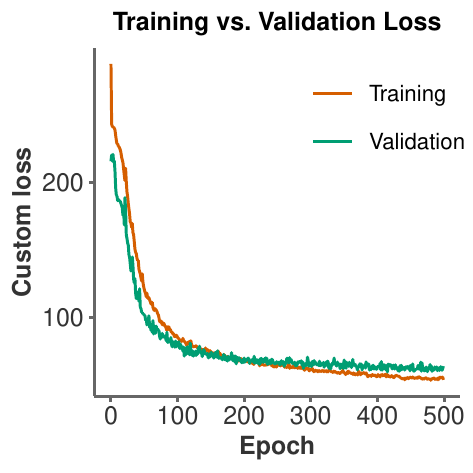

In [10]:
# Usage example:
pdf_file = "Transformer_loss_curve_custom.pdf"
plot_loss_from_df(
    df_epoch,                 # your dataframe
    filename=pdf_file,
    x_column="Epoch",         # or whatever your x-axis is named
    train_column='Train_Custom_loss', # or whatever your training y column is
    val_column='Val_Custom_loss',     # or whatever your validation y column is
    line_width=0.5,           # custom line width
    width_cm=6,
    height_cm=6,
    xlabel="Epoch",
    ylabel='Custom loss',
    title="Training vs. Validation Loss",
    legend_pos=(0.8, 0.8)
)

from pdf2image import convert_from_path
pages = convert_from_path(pdf_file, dpi=200)
from IPython.display import display
display(pages[0])  # Show the first page as an image


##### Fig. 8c

Saved plot: Transformer_MAE_loss_curve.pdf


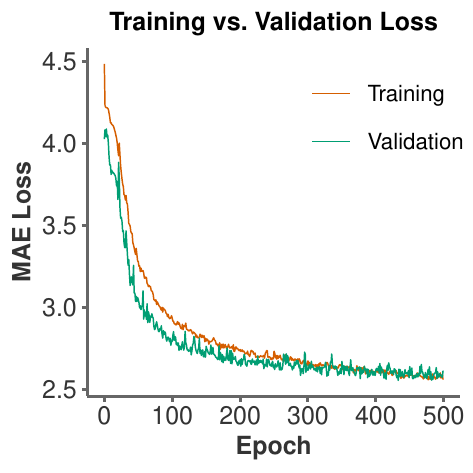

In [11]:
# Usage example:
pdf_file = "Transformer_MAE_loss_curve.pdf"
plot_loss_from_df(
    df_epoch,                 # your dataframe
    filename=pdf_file,
    x_column="Epoch",         # or whatever your x-axis is named
    train_column="Train_MAE", # or whatever your training y column is
    val_column="Val_MAE",     # or whatever your validation y column is
    line_width=0.25,           # custom line width
    width_cm=6,
    height_cm=6,
    xlabel="Epoch",
    ylabel="MAE Loss",
    title="Training vs. Validation Loss",
    legend_pos=(0.8, 0.8)
)

from pdf2image import convert_from_path
pages = convert_from_path(pdf_file, dpi=200)
from IPython.display import display
display(pages[0])  # Show the first page as an image


##### Fig. 8d

Saved plot: Transformer_MSE_loss_curve.pdf


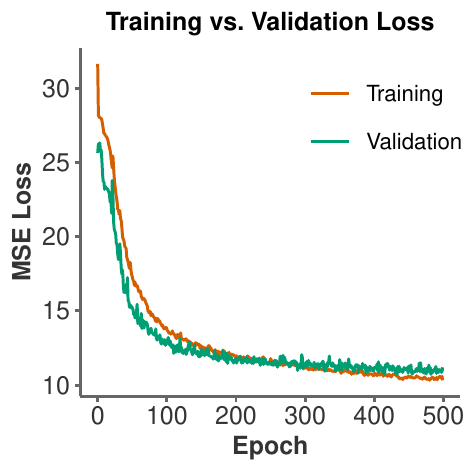

In [12]:
# Usage example:
pdf_file = "Transformer_MSE_loss_curve.pdf"
plot_loss_from_df(
    df_epoch,                
    filename=pdf_file,
    x_column="Epoch",       
    train_column="Train_MSE", 
    val_column="Val_MSE",    
    line_width=0.5,         
    width_cm=6,
    height_cm=6,
    xlabel="Epoch",
    ylabel="MSE Loss",
    title="Training vs. Validation Loss",
    legend_pos=(0.8, 0.8)
)

from pdf2image import convert_from_path
pages = convert_from_path(pdf_file, dpi=200)
from IPython.display import display
display(pages[0]) 
